# RESPON MODUL 7

## Lakukan proses Dilasi, Erosi, Opening dan Closing pada Gambar 'anggur.png' dengan kernel berukuran 3 x 3 (semua nilai di dalamnya adalah 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

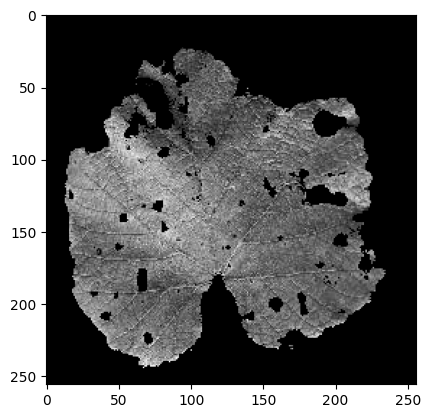

In [2]:
img = cv.imread('anggur.png')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(imgGray, cmap='gray')

In [3]:
se = np.full([3,3], 1, int)

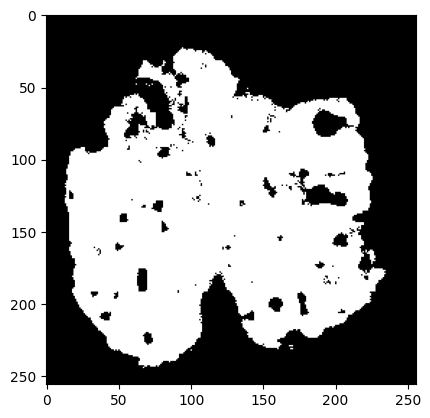

In [4]:
for i in range(imgGray.shape[0]):
        for j in range(imgGray.shape[1]):
            if (imgGray[i,j]>1): 
                imgGray[i,j]=1
            else: 
                imgGray[i,j]=0
plt.imshow(imgGray,cmap='gray')


## DILASI

In [5]:
def dilasi(imgGray, se):
    (height, width) = imgGray.shape[:2]
    seSize = se.shape[0]
    pad = seSize // 2
    output = np.zeros((height, width), dtype=np.uint8)

    for y in range(pad, height - pad):
        for x in range(pad, width - pad):
            if imgGray[y, x] != 0:
                for i in range(-pad, pad + 1):
                    for j in range(-pad, pad + 1):
                        if se[i + pad, j + pad] != 0:
                            output[y + i, x + j] = 255

    return output

(<matplotlib.image.AxesImage at 0x28e45ad34c0>, Text(0.5, 1.0, 'Hasil Dilasi'))

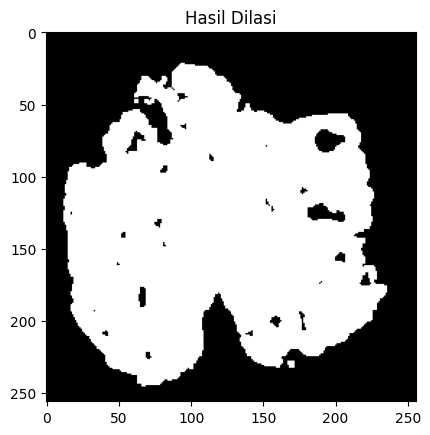

In [6]:
dilated = dilasi(imgGray, se)
plt.imshow(dilated, cmap='gray'), plt.title('Hasil Dilasi')

## EROSI

In [7]:
def erosion(imgGray, se):
    height, width = imgGray.shape
    seSize = se.shape[0]
    pad = seSize // 2
    output = np.zeros((height, width), dtype=np.uint8)

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            if np.all(imgGray[i-pad:i+pad+1, j-pad:j+pad+1] == se):
                output[i,j] = 1
    return output

(<matplotlib.image.AxesImage at 0x28e43933160>, Text(0.5, 1.0, 'Hasil Erosi'))

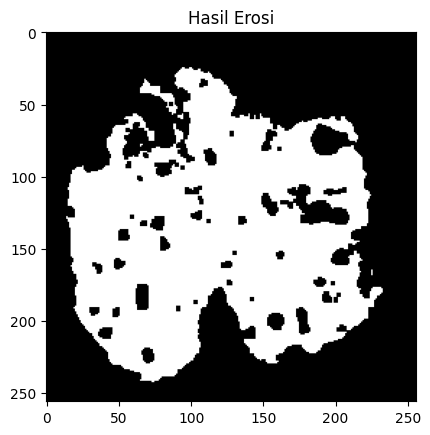

In [8]:
erosi = erosion(imgGray, se)
plt.imshow(erosi, cmap='gray'), plt.title('Hasil Erosi')

## OPENING

(<matplotlib.image.AxesImage at 0x28e439a9c30>,
 Text(0.5, 1.0, 'Hasil Opening'))

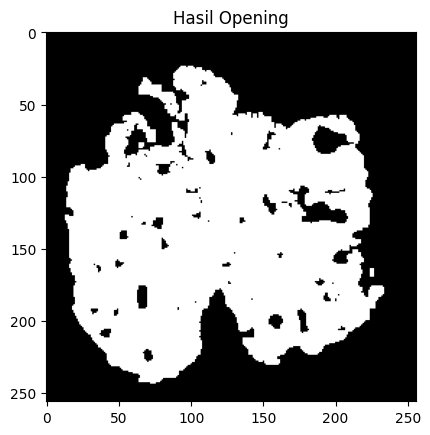

In [9]:
opening = dilasi(erosi, se)
plt.imshow(opening, cmap='gray'), plt.title('Hasil Opening')

## CLOSING

(<matplotlib.image.AxesImage at 0x28e46d50b50>,
 Text(0.5, 1.0, 'Hasil Closing'))

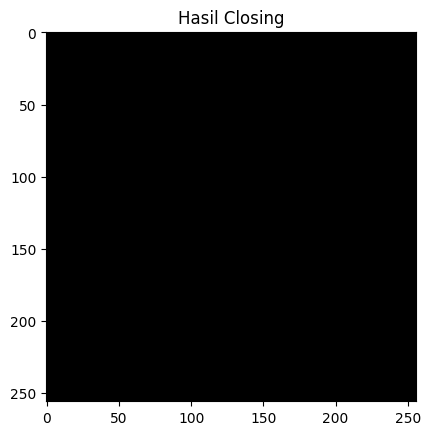

In [12]:
closing = erosion(dilasi(imgGray,se), se)
plt.imshow(closing, cmap='gray'), plt.title('Hasil Closing')